 # 图像的标准化和非标准化
 ## 为什么做标准化?
 1. 梯度爆炸
 2. 构造0中心的数据分布,可以使得梯度下降算法能够有效运行
 ![](img/11641825466_.pic.jpg)

 ## 标准化
 $X^{\prime}=\frac{x-\text { mean }}{\sigma}$

 对于图片而言,mean和std都是我们通过经验值设置的,经验参数如下:
 1. pytorch  mean=[0.485, 0.456, 0.406],   std=[0.229, 0.224, 0.225])
 2. caffe ncnn mean_vals[3] = { 103.94f, 116.78f, 123.68f };  norm_vals[3] = { 0.017f, 0.017f, 0.017f };

 这些经验参数往往可能是通过百万,千万张图片得出的,对于不同的任务我们可以自己改变
 下面我们演示两种方法:
 1. 直接使用transforms.Normalize进行标准化. 
 2. 直接使用数学公式进行转变

In [2]:
import torch
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import PIL as pil

In [3]:

transform = transforms.Compose([
    # 这个操作它降像素点除以了255
    transforms.ToTensor(),
    # 标准化
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225)),
])


def transform_math(matrix, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """使用数学公式做正则化
    """
    transform_math = transforms.Compose([
        transforms.ToTensor()
    ])

    matrix = transform_math(matrix)

    mean = torch.as_tensor(mean).reshape(-1, 1, 1)
    std = torch.as_tensor(std).reshape(-1, 1, 1)
    # 这里直接使用广播实现
    return matrix.sub_(mean).div_(std)



 使用transforms.Normalize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


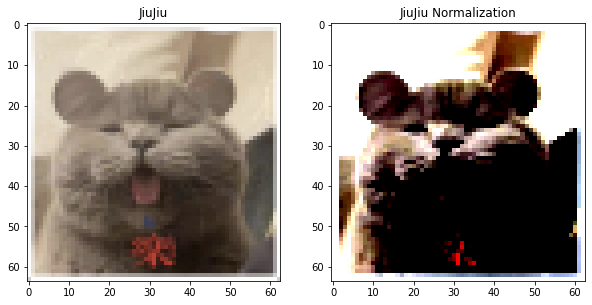

In [4]:
# 转成RGB的图片
cat = pil.Image.open('img/jiujiu.png').convert("RGB")
cat = np.array(cat)
# 设置画幅的总体大小,figsize=(width, height)
plt.figure(figsize=(10, 5))
# plt.subplot(行数,列数,第几个)
plt.subplot(1, 2, 1), plt.title('JiuJiu')
plt.imshow(cat)

cat_numpy = np.array(cat)
# 归一化
cat_normalization = transform(cat_numpy)
# 查看归一化的图片
plt.subplot(1, 2, 2), plt.title('JiuJiu Normalization')
plt.imshow(np.transpose(cat_normalization, axes=[1, 2, 0]))

 直接使用数学公式进行转变

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


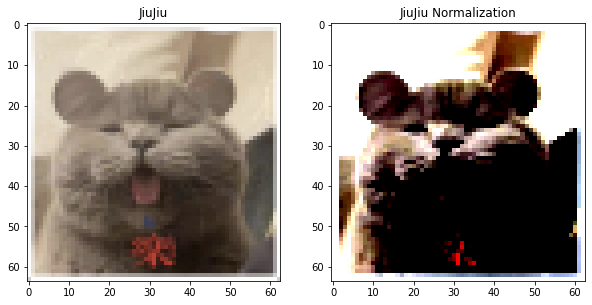

In [5]:
cat = pil.Image.open('img/jiujiu.png').convert("RGB")
cat = np.array(cat)
# 设置画幅的总体大小,figsize=(width, height)
plt.figure(figsize=(10, 5))
# plt.subplot(行数,列数,第几个)
plt.subplot(1, 2, 1), plt.title('JiuJiu')
plt.imshow(cat)

cat_numpy = np.array(cat)
# 归一化
cat_normalization = transform_math(cat_numpy)
# 查看归一化的图片
plt.subplot(1, 2, 2), plt.title('JiuJiu Normalization')
plt.imshow(np.transpose(cat_normalization, axes=[1, 2, 0]))



 注意:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
 是因为标准化的操作,有些像素点并不在[0..1]和[0..255]之间

 像素点分布

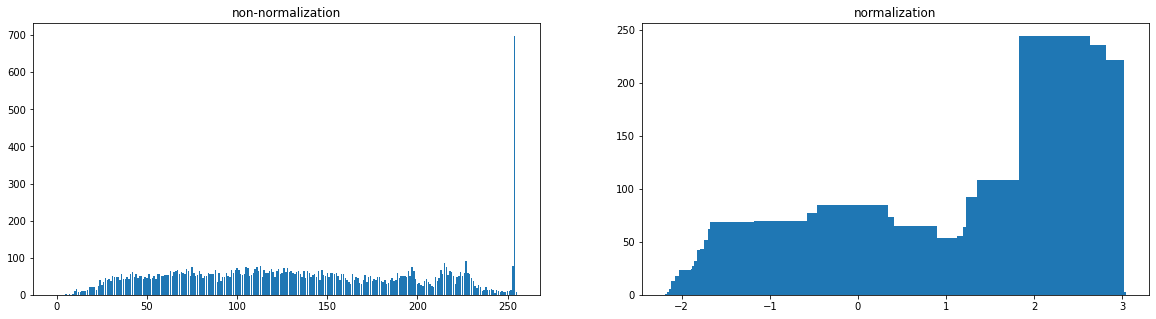

In [6]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
flatten = cat_numpy.flatten()
proportion = {i: 0 for i in range(256)}
for i in flatten:
    proportion[i] += 1
keys = list(proportion.keys())
values = list(proportion.values())
plt.bar(keys, values), plt.title('non-normalization')


flatten = cat_normalization.flatten()
proportion = {}
for i in flatten:
    _i = round(float(i), 2)
    if _i not in proportion:
        proportion[_i] = 0
    proportion[_i] += 1
keys = list(proportion.keys())
values = list(proportion.values())
plt.subplot(1, 2, 2)
plt.bar(keys, values), plt.title('normalization')
plt.show()

 由此可以看出标准化的目的,并没有将其转变成了为了`正态分布`,而是将数值减少防止`梯度爆炸`,同时将其值置为`正负之间`可以使得梯度下降的更快,学习的更快.

 ## 反标准化
 反标准化就是将原来进行过标准化操作的图片还原为原图

In [8]:
cat_unnormalized = np.transpose(cat_normalization, [1, 2, 0]) * \
    (np.array([0.229, 0.224, 0.225])*255.) + \
    np.array([0.485, 0.456, 0.406])*255.
print('随机抽取查看标准化和反标准化的像素点情况:')
print('cat_unnormalized[0][2][1]', float(cat_unnormalized[0][2][0]))
print('cat[0][2][1]', cat[0][2][0])
print('直接取int类型将会造成丢失,因为在ToTensor的操作中,将所有的像素点除以了255,所有我使用round进行四舍五入的操作')
print('cat_unnormalized[0][2][1]', round(float(cat_unnormalized[0][2][0])))
print('cat[0][2][1]', cat[0][2][0])





随机抽取查看标准化和反标准化的像素点情况:
cat_unnormalized[0][2][1] 253.99999106168747
cat[0][2][1] 254
直接取int类型将会造成丢失,因为在ToTensor的操作中,将所有的像素点除以了255,所有我使用round进行四舍五入的操作
cat_unnormalized[0][2][1] 254
cat[0][2][1] 254


# 参考
1. https://www.zhihu.com/question/49096923